# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-29 16:21:18.321712: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-29 16:21:18.321887: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 16:21:18.323953: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 16:21:18.349608: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 16:21:18.880308: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 1
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, boost=1, seed=42)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=499)

Epoch 1/499: accuracy 0.000%  for 4
Epoch 2/499: accuracy 0.000%  for 4
Epoch 3/499: accuracy 0.000%  for 8
Epoch 4/499: accuracy 0.000%  for 7
Epoch 5/499: accuracy 0.000%  for 2
Epoch 6/499: accuracy 100.000%  for 5
Epoch 7/499: accuracy 0.000%  for 4
Epoch 8/499: accuracy 0.000%  for 4
Epoch 9/499: accuracy 0.000%  for 0
Epoch 10/499: accuracy 0.000%  for 3
Epoch 11/499: accuracy 0.000%  for 2
Epoch 12/499: accuracy 0.000%  for 6
Epoch 13/499: accuracy 100.000%  for 5
Epoch 14/499: accuracy 0.000%  for 6
Epoch 15/499: accuracy 0.000%  for 3
Epoch 16/499: accuracy 0.000%  for 3
Epoch 17/499: accuracy 0.000%  for 3
Epoch 18/499: accuracy 0.000%  for 3
Epoch 19/499: accuracy 0.000%  for 3
Epoch 20/499: accuracy 0.000%  for 3
Epoch 21/499: accuracy 0.000%  for 3
Epoch 22/499: accuracy 0.000%  for 3
Epoch 23/499: accuracy 0.000%  for 3
Epoch 24/499: accuracy 0.000%  for 3
Epoch 25/499: accuracy 0.000%  for 3
Epoch 26/499: accuracy 0.000%  for 3
Epoch 27/499: accuracy 0.000%  for 3
Epoch 

In [7]:
print("\n", model.input_weights[:2], "...")
print("\n", model.hidden_weights[0])
print("\n", model.output_weights[:2], "...")



 [[-7  5  3 ...  3 -7 -7]
 [-1  2  7 ... -1 -7  2]] ...

 [[7 7 7 ... 7 5 5]
 [7 7 7 ... 7 7 7]
 [7 7 4 ... 5 5 6]
 ...
 [7 7 7 ... 7 7 7]
 [5 5 7 ... 7 7 7]
 [7 7 7 ... 5 7 7]]

 [[-118  -15    7    7   10  -89  -17   20  -27   20  -79  -19    7  109
   -16   25  -25   12  -57   30  -55  -15    7   -8  -15    7   11    7
     7   29   12   10    9  -27    7    7   17    7  -27   41  -47   25
     7   13   15    9  -15  -24   19    7   25    7  -20   10   80   45
    20   20    9   23   18    7 -110  -93  -61 -111   49    7  -17   91
   -50   -8   92  -18 -124   18   39   46    7   22    7  -30  -29  116
   -24 -118   15    7   90  -15   10  -82    7  110  -53   21   23    7
    -8  -30   72   10  -91   24    7    7    7    7   -8   10  -14   27
   -94    7  -23  -47   42   -8   42  -59    7    6    7   20   14    7
    25   14]
 [ -58  -27  -85 -111  -18  -89    7    7   12  124 -111   20  -22    7
    11    7  -15   17  -15    7  -53   89   32    7  -81  -14   10    7
   -16    7  -


 [3337 3054 2064 2327 3699 2249 2574 2461 1578 2650 2098 3915 2335 2048
 4174 2578 2477 2865 1183 2648 3531 2477 2619 1635 2265 2766 1907 1660
 2122 2428 2344 3288 3109 2936 2947 2272 1729 3153 1724 4012 2649 3564
 4135 3384 4075 2758 2453 1611 2860 2679 2510 2305 3754 1914 3485 1849
 2048 3161 2879 1412 2760 2939 2109 2425 1807 3634 2206 2447 2590 2450
 2150 2033 3339 1887 5283 4459 2470 4602 2596 2651 3269 3247 4112 2329
 6063 3958 3706 2577 3415 2378 2396 2289 2238 1794 3234 3027 2920 2640
 3422 2724 3985 1742 2162 2909 2713 2142 2502 2461 2105 2710 3119 2534
 3004 3715 1583 3653 2667 2445 2126 1858 1385 3176 2361 2345 2474 2607
 4199 3203]

 [13904 14026 15075 14862 14558 12063 14319 13717 14060 15380 15022 14703
 15058 13406 16310 15681 15503 14616 13569 13275 14655 16313 14043 13529
 14412 15021 14031 17294 15094 13938 14140 14444 15189 14269 14253 15374
 14736 14919 13546 16541 14536 13691 15179 14093 15951 13802 15633 15654
 15227 13601 13571 14408 13708 16044 16725 13095 1510

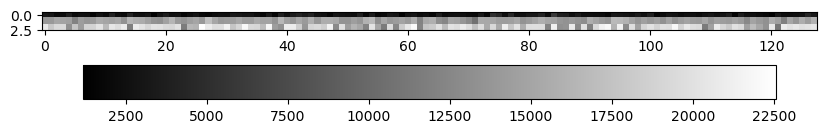


 [10025 10007 10163 10922  7736  9167 10070  7821  9768  8512]


In [8]:
plt.figure(figsize = (10,3))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="horizontal")
print("\n", model.last_intermediate_outputs[0])
print("\n", model.last_intermediate_outputs[1])
print("\n", model.last_intermediate_outputs[2])
plt.show()
print("\n", model.last_outputs)

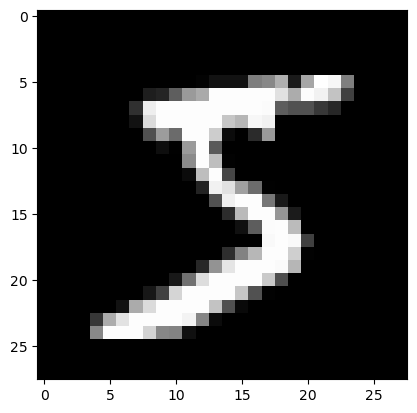

In [9]:
plt.imshow(train_images[N-1].reshape(28,28), cmap="grey")